# This is a homework 1 for CSC588 Statistical Learning Course
# Done by Ivan Akinfiev 

## Problem 3 (a)

In [267]:
import random as rn
import numpy as np
import pandas as pd 
from typing import List
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [268]:
def generate_data(n, lam):
    data = pd.DataFrame([], columns=['x_1', 'x_2', 'y'])
    count = 0
    w_star = (1/math.sqrt(2), 1/math.sqrt(2))
    while True:
        if count == n:
            break
        x_1 = np.random.uniform(-1,1)
        x_2 = np.random.uniform(-1,1)
        x_i = np.array([x_1,x_2])
        norm = np.linalg.norm(x_i, ord=2)
        if norm <= 1:     
            wx_dot = np.dot(x_i, w_star)
            if np.abs(wx_dot) >= lam:
                data.loc[count] = (x_i[0], x_i[1], np.sign(wx_dot))
                count += 1
        else:
            continue

    return data






In [269]:
sample_1000 = generate_data(1000, 1/32 )
sample_1000


x_1       x_2    y
0    0.009787  0.485603  1.0
1   -0.344589 -0.444828 -1.0
2    0.448348  0.112515  1.0
3   -0.290947  0.755389  1.0
4   -0.060750 -0.009066 -1.0
..        ...       ...  ...
995  0.761210  0.475867  1.0
996  0.554750  0.661231  1.0
997 -0.422267 -0.622717 -1.0
998 -0.062733  0.006968 -1.0
999 -0.558891  0.226253 -1.0

[1000 rows x 3 columns]

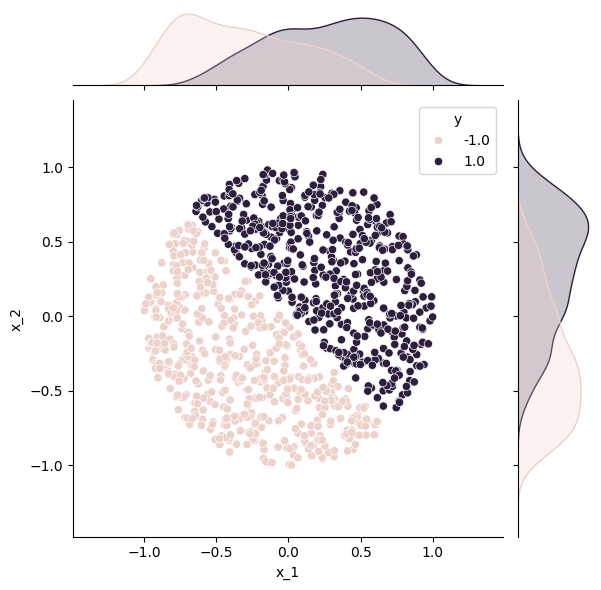

In [270]:
sns.jointplot(data=sample_1000, x='x_1', y='x_2', hue='y')

### (b)

TOTAL M VALUE IS: 12
FINAL WEIGHTS ARE: 1.3796161659813737   1.4919113180729662


12

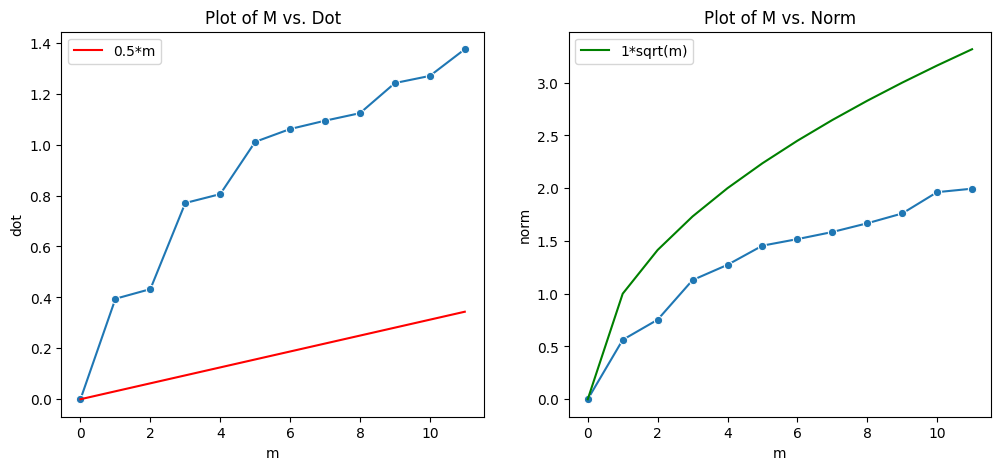

In [271]:
def sim_perceptron(data: pd.DataFrame, lam = 1/32, draw=True, plot=True):
    data_for_plot = pd.DataFrame([], columns=['m', 'dot', 'norm'])
    w_iter = np.array([0,0])
    w_star = np.array([0.5, 0.5])
    M = 0 
    for iteration in range(len(data)):
        y_true = data.iloc[iteration,2]
        y_hat = np.sign(np.dot((data.iloc[iteration,0],data.iloc[iteration,1]), w_iter))
        if y_hat == 0: y_hat = 1
        if y_hat == y_true:
            continue
        else:
            norma = np.linalg.norm(w_iter,2)
            dots = np.dot(w_iter,w_star)
            w_iter = w_iter + np.array([y_true*data.iloc[iteration,0], y_true*data.iloc[iteration,1]])
            data_for_plot.loc[M] = [M, dots, norma]
            M += 1
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.lineplot(ax=axes[0], x='m', y='dot', data=data_for_plot, marker='o')
        axes[0].set_title('Plot of M vs. Dot')
        axes[0].plot(data_for_plot['m'], lam * data_for_plot['m'], label='0.5*m', color='red')
        axes[0].legend()
        sns.lineplot(ax=axes[1], x='m', y='norm', data=data_for_plot, marker='o')
        axes[1].set_title('Plot of M vs. Norm')
        axes[1].plot(data_for_plot['m'], np.sqrt(data_for_plot['m']), label='1*sqrt(m)', color='green')
        axes[1].legend() 
    if draw:
        print("TOTAL M VALUE IS: " + str(M))
        print("FINAL WEIGHTS ARE: " + str(w_iter[0]) + "   " + str(w_iter[1]))
    
    
    return M
            
            
            
            
            

sim_perceptron(sample_1000)

Indeed, as we see, the graphs give us the correct bounds for both dot products and norms.

### (c)

We will plot only $1/\lambda^2$ up untill $\lambda = \frac{1}{2^{-4}}$ in order the plot not explode in the skies, because $1/(1/4098)^2$ already is a very big number

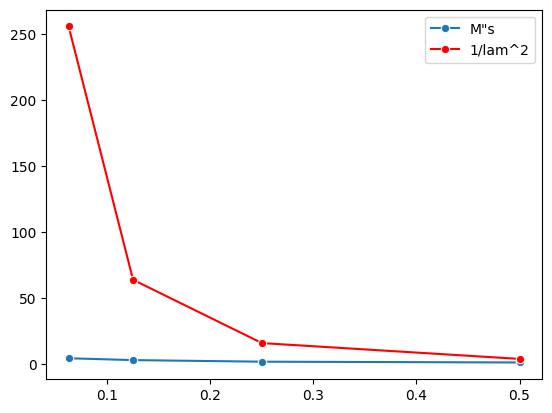

In [277]:
def problem_c():
    lams = [2**(-i) for i in range(1,7)]
    M_i = []
    for i in lams:
        list_of_datasets = [generate_data(n=100,lam=i) for j in range(10)]
        sim_percs = [sim_perceptron(data=ds, draw=False, plot=False) for ds in list_of_datasets]
        M_i.append(np.mean(sim_percs))
    
    lams_squared = []
    for i in lams:
        lams_squared.append(1/(i**2))
    sns.lineplot(x=lams[:-2], y=M_i[:-2], marker='o', label='M"s')
    sns.lineplot(x=lams[:-2], y=lams_squared[:-2], label='1/lam^2', color='red', marker='o')
problem_c() 

It is always far below $1/\lambda^2$ due to the Perceptron Convergence Theorem. 
